In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
s, o, r, h, m, c, H, N, W, S, y, n  = 'S', 'O', 'R', 'H', 'M', 'C', 'h', 'n', 'w', 's', 'Y', 'N' 

a1 = np.array([s, s, o, r, r, r, o, s, s, r, s, o, o, r]).reshape((-1, 1))
a2 = np.array([h, h, h, m, c, c, c, m, c, m, m, m, h, m]).reshape((-1, 1))
a3 = np.array([H, H, H, H, N, N, N, H, N, N, N, H, N, H]).reshape((-1, 1))
a4 = np.array([W, S, W, W, W, S, S, W, W, W, S, S, W, S]).reshape((-1, 1))
a5 = np.array([n, n, y, y, y, n, y, n, y, y, y, y, y, n]).reshape((-1, 1))

In [8]:
data = np.concatenate((a1, a2, a3, a4, a5), axis=1)

In [9]:
data

array([['S', 'H', 'h', 'w', 'N'],
       ['S', 'H', 'h', 's', 'N'],
       ['O', 'H', 'h', 'w', 'Y'],
       ['R', 'M', 'h', 'w', 'Y'],
       ['R', 'C', 'n', 'w', 'Y'],
       ['R', 'C', 'n', 's', 'N'],
       ['O', 'C', 'n', 's', 'Y'],
       ['S', 'M', 'h', 'w', 'N'],
       ['S', 'C', 'n', 'w', 'Y'],
       ['R', 'M', 'n', 'w', 'Y'],
       ['S', 'M', 'n', 's', 'Y'],
       ['O', 'M', 'h', 's', 'Y'],
       ['O', 'H', 'n', 'w', 'Y'],
       ['R', 'M', 'h', 's', 'N']], dtype='<U1')

In [10]:
df = pd.DataFrame(data, columns=["Outlook", "Temperature", "Humidity", "Wind", "Play"])

In [11]:
df

,Outlook,Temperature,Humidity,Wind,Play
0,S,H,h,w,N
1,S,H,h,s,N
2,O,H,h,w,Y
3,R,M,h,w,Y
4,R,C,n,w,Y
5,R,C,n,s,N
6,O,C,n,s,Y
7,S,M,h,w,N
8,S,C,n,w,Y
9,R,M,n,w,Y


In [12]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
sktree = DecisionTreeClassifier(criterion='entropy')

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in range(data.shape[1]):
    data[:, i] = le.fit_transform(data[:,i])

In [20]:
data

array([['2', '1', '0', '1', '0'],
       ['2', '1', '0', '0', '0'],
       ['0', '1', '0', '1', '1'],
       ['1', '2', '0', '1', '1'],
       ['1', '0', '1', '1', '1'],
       ['1', '0', '1', '0', '0'],
       ['0', '0', '1', '0', '1'],
       ['2', '2', '0', '1', '0'],
       ['2', '0', '1', '1', '1'],
       ['1', '2', '1', '1', '1'],
       ['2', '2', '1', '0', '1'],
       ['0', '2', '0', '0', '1'],
       ['0', '1', '1', '1', '1'],
       ['1', '2', '0', '0', '0']], dtype='<U1')

In [21]:
sktree.fit(data[:, :-1], data[:, -1])

DecisionTreeClassifier(criterion='entropy')

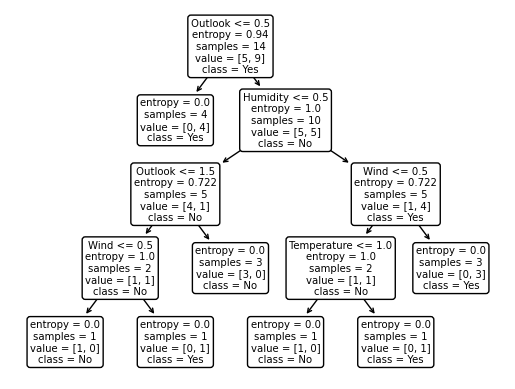

In [24]:
from sklearn.tree import plot_tree
plot_tree(sktree, feature_names=df.columns, class_names=["No", "Yes"], rounded=True)
plt.show()